In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)

from sqlalchemy import create_engine

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading BokehJS ...

In [2]:
irisDf = pd.read_csv('./data/Iris.csv')
# Sample Timeseries  picked from here https://www.backblaze.com/b2/hard-drive-test-data.html
hdd2013Df = pd.read_csv('./data/hdd_2013-11-26.csv')

In [3]:
# Create classes for showing off correlation_analyze's heatmapping ability
def createClasses(x):
    rdm = random.random()
    if rdm < 0.3:
        return 'A'
    elif rdm > 0.3 and rdm < 0.6:
        return 'B' 
    else:
        return 'C'
irisDf['Class'] = irisDf['Species'].apply(createClasses)

In [4]:
irisDf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
irisDf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,C
1,2,4.9,3.0,1.4,0.2,Iris-setosa,C
2,3,4.7,3.2,1.3,0.2,Iris-setosa,C
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C
4,5,5.0,3.6,1.4,0.2,Iris-setosa,C


In [6]:
irisDf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [7]:
irisDf.select_dtypes(include=[np.number]).columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [8]:
analyze.correlation_analyze(irisDf, exclude_columns='Id', 
                                categories=['Species', 'Class'], 
                                measure=['SepalLengthCm','SepalWidthCm',
                                           'PetalLengthCm', 'PetalWidthCm'])

# Correlation btw Numerical Columns
# Correlation btw Columns Species & Class by measure SepalLengthCm


# Correlation btw Columns Species & Class by measure SepalWidthCm


# Correlation btw Columns Species & Class by measure PetalLengthCm


# Correlation btw Columns Species & Class by measure PetalWidthCm


# Pandas correlation coefficients matrix
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  
# Pandas co-variance coefficients matrix
                        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1887.500000      25.782886     -7.492282      67.667785   
SepalLengthCm    25.782886       0.685694     -0.039268       1.273682   
SepalWidthCm     -7.492282      -0.039268      0.188004      -0.321713   
PetalLengthCm  

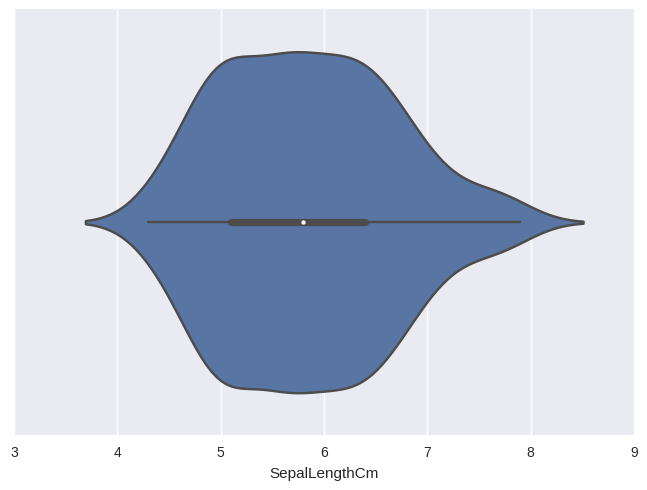

In [9]:
analyze.dist_analyze(irisDf, 'SepalLengthCm')

In [10]:
analyze.regression_analyze(irisDf, 'SepalLengthCm', 'SepalWidthCm')

/home/anand/playspace/data-science-utils/datascienceutils/predictiveModels.py:114: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  source = dataframe[column].reshape((len(target), 1))


0.0119616328348


In [11]:
target = irisDf.Species
irisDf.drop(['Species', 'Class'], 1, inplace=True)


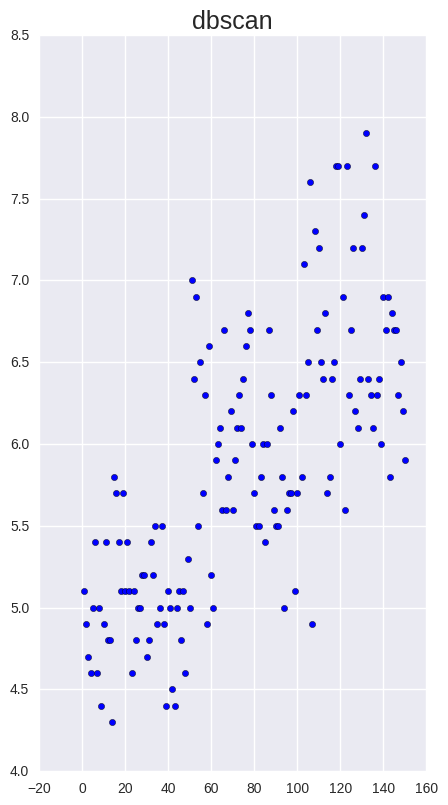

In [12]:
analyze.cluster_analyze(irisDf, cluster_type='dbscan')

In [13]:
#analyze.som_analyze(df, (10,10), algo_type='som')

In [14]:
hdd2013Df.fillna(value=0, inplace=True)
hdd2013Df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,2.655000e+04,26550.000000,26550.0,2.655000e+04,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,...,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0,26550.0
mean,2.895978e+12,0.000151,0.0,5.556346e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.723011e+11,0.012274,0.0,7.741375e+07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000205e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000399e+12,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000593e+12,0.000000,0.0,1.025500e+03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.000787e+12,0.000000,0.0,1.092058e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000787e+12,1.000000,0.0,1.041384e+09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
hdd2013Df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2013-11-26,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-11-26,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-11-26,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-11-26,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-11-26,PL1311LAG2205A,Hitachi HDS5C4040ALE630,4000787030016,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
hdd2013Df['date'] = hdd2013Df['date'].astype('datetime64[ns]')

In [17]:
hdd2013Df['date'] = [each + datetime.timedelta(0, i*45) for i, each in enumerate(hdd2013Df.date)]

/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:82: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  new_df = new_df.resample(timeInterval, func)
/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
  rolmean = pd.rolling_mean(timeseries, window=12)
/home/anand/playspace/data-science-utils/datascienceutils/timeSeriesUtils.py:9: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).std()
  rolstd = pd.rolling_std(timeseries, window=12)


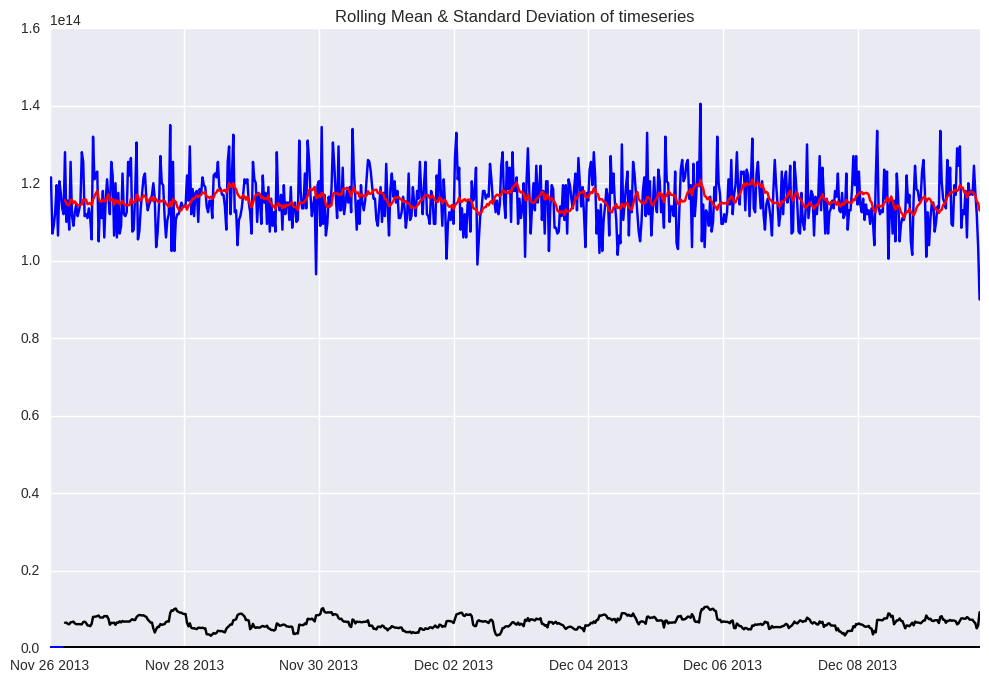

Results of Dickey-Fuller Test:
Test Statistic                -6.208540e+00
p-value                        5.580408e-08
#Lags Used                     1.700000e+01
Number of Observations Used    6.460000e+02
Critical Value (1%)           -3.440513e+00
Critical Value (10%)          -2.569158e+00
Critical Value (5%)           -2.866024e+00
dtype: float64


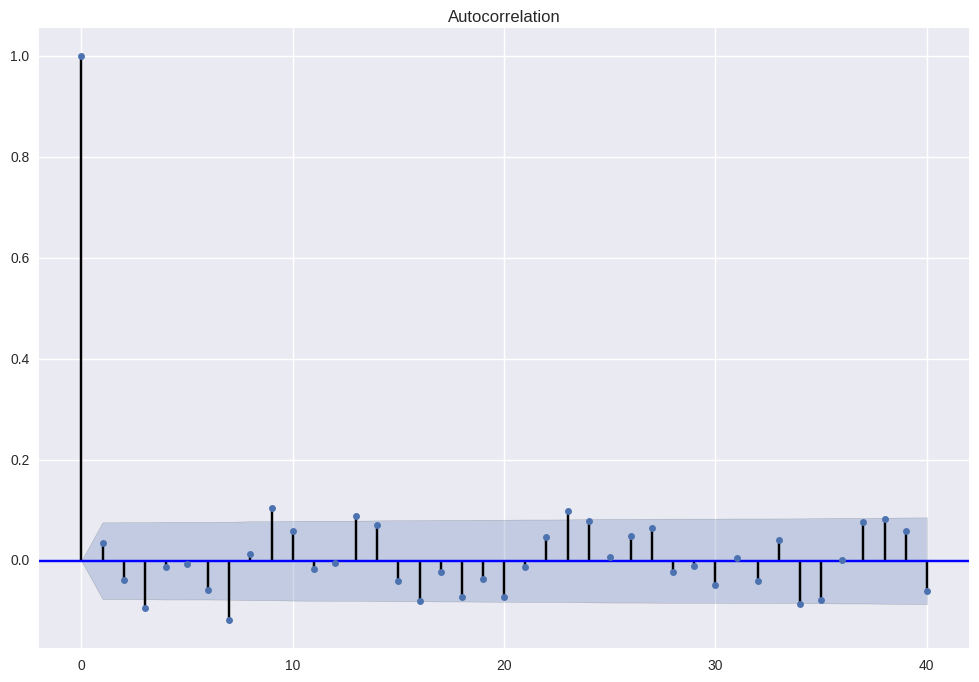

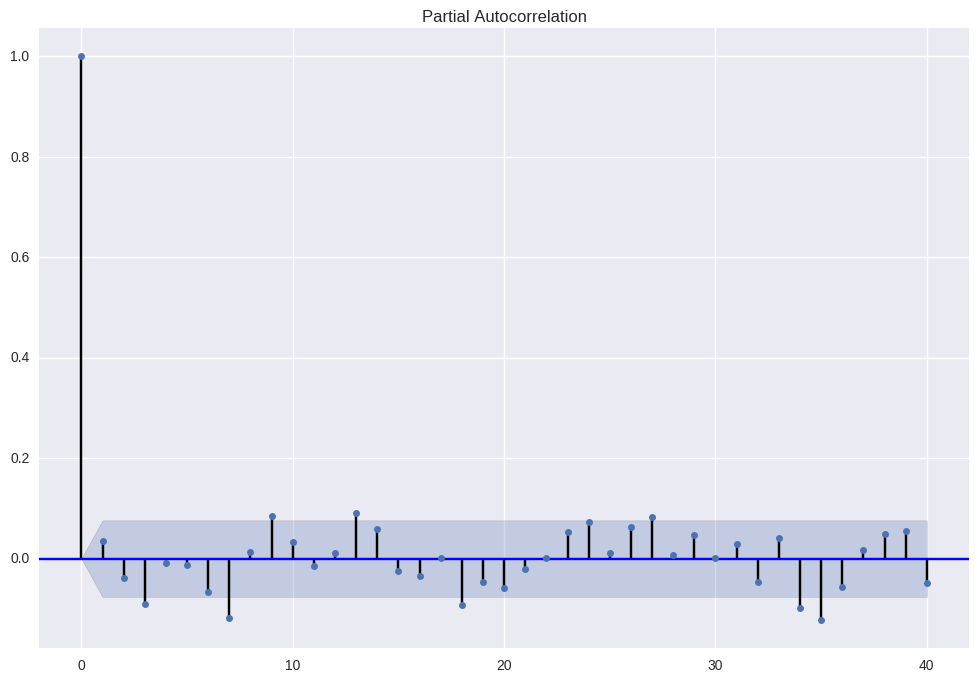

30s


ValueError: freq T not understood. Please report if you think this in error.

In [18]:
analyze.time_series_analysis(hdd2013Df, timeCol='date', valueCol='smart_1_raw', seasonal={'freq': '30s'})